## Objetivos



**As metas desse tutorial são:**
- Fazer uma breve revisão sobre caracterização de canal;
- Caracterizar o desvanecimento de larga escala **(PathLoss e Shadowing)** e pequena escala **(Multpath e Doppler)**;
- Apresentar métodos de estimação da frequência **Doppler**, _Level Crossing Rate (LCR) e Average Fading Duration_(AFD). 

## Sistema de comunicação móvel

Os sistemas de redes de comunicações móveis veem se destacando há muito tempo, mas sempre possuem o desafio de vencer os intempéries do meio de propagação.
Destaca-se principalmente o desvanecimento proveniente da distância entre o Tx e o RX, o espalhamento e o bloqueio do sinal decorrente dos objetos que ficam entre ambos, e por último, a defasagem devido a mobilidade do transmissor, receptor ou ambos.
Dessa forma,impõe-se a necessidade de se estudar com mais profundidade os parâmetros que caracterizam um canal radio
móvel.
Tradicionalmente, os modelos de propagação tem focado na predição de uma intensidade média do sinal rebebido a uma  determinada distância do transmissor, além da variabilidade da intensidade do sinal. 

O conhecimento do canal permite ao projetista, ou até mesmo ao sistema de maneira
autônoma, conhecer a principal barreira a se vencer para o sucesso na transmissão da
informação. Teoricamente, ao se conhecer com precisão as características do canal, é
possível explorar por completo a capacidade do enlace de comunicação

## Desvanecimento Larga Escala (_PathLoss_) e o Sombreamento (_Shadowing_)

O **_PathLoss_** é a variação da intensidade do sinal decorrente da distância entre o Tx e o Rx.
Esse desvanecimento de larga escala possui caracteristicas que varia de acordo com o sistema irradiante, frequência de operação, clima e etc.
Além disso, o sinal sofre variações aleatórias que são ocasionadas pelos obstáculos que  presentes no meio de propagação, entre transmissor e receptor, gerando um sobreamento, **_Shadowing_**, do sinal recebido.
Existem vários estudos e modelos de predição do expoente da perda de percurso e desvio padrão de sombreamento.
A figura abaixo, ilustra os fenômenos.


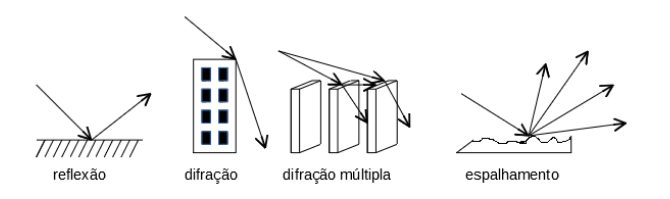

A equação que modela o **_PathLoss_** e o **_Shadowing_**:
- d0 é uma distância referência;
- d distância entre transmissor e receptor.
- n expoente de perda de percurso (medido empíricamente);
- Xσ é uma variável aleatória que representa o sombreamento log-normal e tem como principal parâmetro o desvio padrão σ.

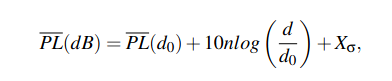

## Desvanecimento de Pequena Escala (_MultPath_) e o _Doppler_

Quando nos deparamos com mudanças bruscas e rápidas na intensidade do sinal, fase e atraso, estamos tratando do desvanecimento de pequena escala. Ele ocorre devido os múltiplos caminhos que o sinal percorre até o receptor.
Quando existe movimento do Tx e/ou Rx, o sinal passa sofrer efeito do espalhamento _Doppler_.
Os efeitos que esses fenômenos, **_MultiPath e Doppler_**, causam no sinal, podem ser sintetizados resume 
- Dispersão do sinal no tempo causado pelo atraso de propagação dos _multpaths_;
- Dispersão do sinal em frequência devido ao efeito _Doppler_;
- Possível interferência inter-simbólica (ISI);
- Redução na Relação Sinal-Ruído (SNR).


A figura abaixo ilustra os fenômenos citados.
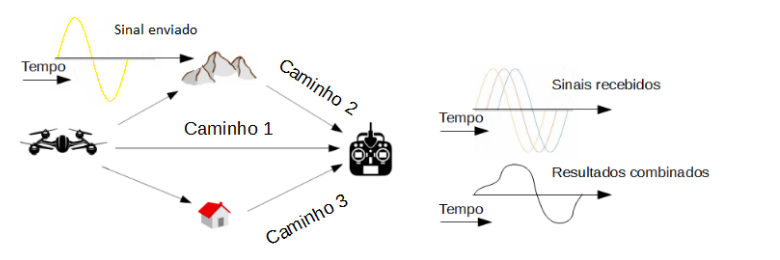

A caracterização do desvanecimento de pequena escala é feita por estatísticas de
segunda ordem, sendo elas:
- _LCR - Level Crossing Rate_; 
- _AFD - Average Fade Duration_, \
comumente utilizadas para caracterizar o efeito Doppler nos canais móveis.

## _Level Crossing Rate_ (LCR) e _Average Fading Duration_(AFD)

A taxa de cruzamento de nível, **LCR**, é a medida do número médio de vezes que um sinal cruza um determinado limiar no sentido positivo.
- **r** é as amostras do desvanecimento Rayleigh;
- **_fd_** é a frequência _Doppler_;
- **NRayleigh(ρ)** = **LCR** é expresso em cruzamentos por segundo.

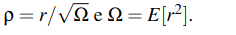

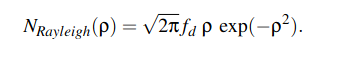

A duração média de desvanecimento, **AFD**, é a medição do tempo médio sobre o qual o sinal está abaixo de um determinado limiar. \
A **AFD** é expresso na unidade (m/s) e dado pela equação abaixo:



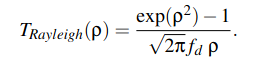

- _ρ = R/Rrms_ é o valor do nível de amplitude;
- _R_ é normalizado para a amplitude rms local do envelope de desvanecimento;
- O valor _Rrms_ é baseado na distribuição _Rayleigh_ do envelope de sinal recebido.



Com os valores obtidos acima, torna-se possível calcular a _frequência Doppler estimada_ pela equação abaixo:

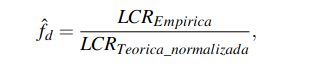
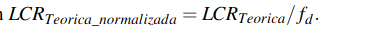

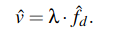

Tanto o **LCR** quanto o **AFD** podem ser usados para projetar o formato de sinalização/esquema de diversidade para sistemas celulares com qualidade, pois um canal que apresenta
um elevado valor de **AFD** tem influência direta na quantidade de pacotes recebidos
com erros.


# Prática

## Parte 1: Geração de funções

**Passo 01:** Abra um script no Matlab para gerar a função do modelo de filtragem, salve-o como **FWGN_model.m** e escreva o seguinte código:

In [ ]:
%Gerando a função do modelo FWGN

function [h,Nfft,Nifft,doppler_coeff]=FWGN_model(fm,fs,N)
% FWGN (Clarke/Gan) Model
% Input: fm= Maximum Doppler frquency
% fs= Sampling frequency, N = Number of samples
% Output: h = Complex fading channel
Nfft = 2^max(3,nextpow2(2*fm/fs*N)); % Nfft=2^n
Nifft = ceil(Nfft*fs/(2*fm));
% Generate the independent complex Gaussian random process
GI = randn(1,Nfft); 
GQ = randn(1,Nfft);
% Take FFT of real signal in order to make hermitian symmetric
CGI = fft(GI); 
CGQ = fft(GQ);
% Nfft sample Doppler spectrum generation
doppler_coeff = Doppler_spectrum(fm,Nfft);
% Do the filtering of the Gaussian random variables here
f_CGI = CGI.*sqrt(doppler_coeff);
f_CGQ = CGQ.*sqrt(doppler_coeff);
% Adjust sample size to take IFFT by (Nifft-Nfft) sample zero-padding
Filtered_CGI=[f_CGI(1:Nfft/2) zeros(1,Nifft-Nfft) f_CGI(Nfft/2+1:Nfft)];
Filtered_CGQ=[f_CGQ(1:Nfft/2) zeros(1,Nifft-Nfft) f_CGQ(Nfft/2+1:Nfft)];
hI = ifft(Filtered_CGI); 
hQ= ifft(Filtered_CGQ);
% Take the magnitude squared of the I and Q components and add them
rayEnvelope = sqrt(abs(hI).^2 + abs(hQ).^2);
% Compute the root mean squared value and normalize the envelope
rayRMS = sqrt(mean(rayEnvelope(1:N).*rayEnvelope(1:N)));
h = complex(real(hI(1:N)),-real(hQ(1:N)))/rayRMS;

**Passo 02:** Abra um segundo script no Matlab para gerar a função de geração de Doppler, salve-o como **Doppler_spectrum.m** e escreva o seguinte código:

In [ ]:
%Gerando o Doppler
function y=Doppler_spectrum(fd,Nfft)
% fd = Maximum Doppler frequency
% Nfft= Number of frequency domain points
df = 2*fd/Nfft; % frequency spacing
% DC component first
f(1) = 0; y(1) = 1.5/(pi*fd);
% The other components for one side of the spectrum
for i = 2:Nfft/2
f(i)=(i-1)*df; % frequency indices for polynomial fitting
y([i Nfft-i+2]) = 1.5/(pi*fd*sqrt(1-(f(i)/fd)^2));
end
% Nyquist frequency applied polynomial fitting using last 3 samples
nFitPoints=3 ; 
kk=[Nfft/2-nFitPoints:Nfft/2];
polyFreq = polyfit(f(kk),y(kk),nFitPoints);
y((Nfft/2)+1) = polyval(polyFreq,f(Nfft/2)+df);

**Passo 03:** Abra um novo script no Matlab para gerar a função de geração do _Fading_, salve-o como **gerFading.m** e escreva o seguinte código:

> In polyfit (line 79)
  In Doppler_spectrum (line 15)
  In FWGN_model (line 15)


Error using eval
Undefined function or variable 'timeaxis'.



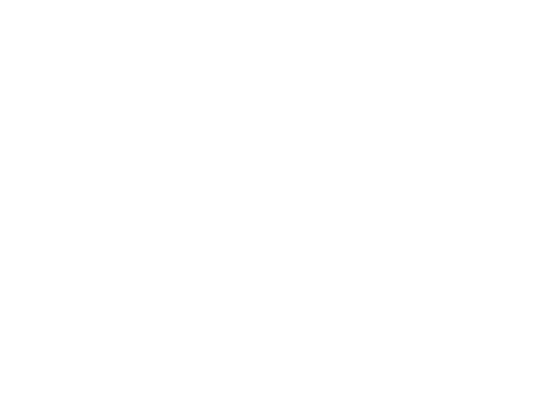

In [57]:
% Geração do Fading 
clear; clear all; clc;
% 
speedKm = 60;
speedMs = speedKm/3.6;
light = 3e8;
fCarrier = 915e6;
lambda = light/fCarrier;
dopplerMax = speedMs/lambda;

ts=50e-6;
fs=1/ts;
numberSamples=1e6; 
[h,Nfft,Nifft,doppler_coeff] = FWGN_model(dopplerMax,fs,numberSamples);
save('Clarke');


**Passo 04:** Abra um novo script no Matlab para gerar a função de cálculo do **LCR**, salve-o como **LCR_.m** e escreva o seguinte código:

In [22]:
%%Função de cálculo LCR

function [LCR] = LCR_(amostras, nivel, ts)
    AFD = 0;
    LCR = 0;  
    x=[];
for i=1:length(amostras)
      if (amostras(1,i) < nivel)
          x(i) = 1;
      else
        x(i) = 0;
      end
end

a=x;
    for i=length(amostras):-1:2
      if (x(i) == 1 && x(i-1) == 1)
          
        a(i - 1) = 0;
      end
    end
    
LCR = sum(a)/(ts*length(amostras));

Error: Function definition not supported in this context. Create functions in code file.



**Passo 05:** Abra um novo script no Matlab para gerar a função de contagem do **LCR**, salve-o como **ContandoLCR.m** e escreva o seguinte código:

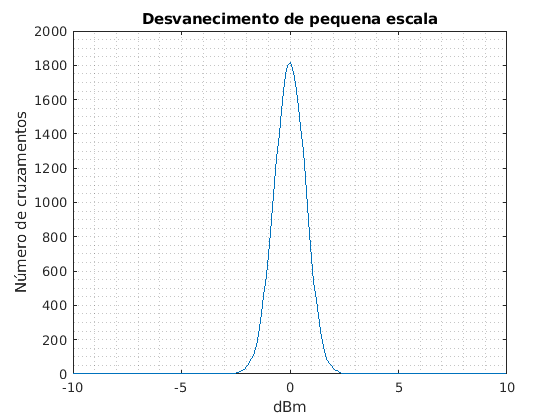

In [56]:
%%Cálculo da LCR (contando LCR)
clc; clear all; close all;

filename = 'Clarke.mat';
delimiterIn = ' ';
headerlinesIn = 1;
B = importdata(filename,delimiterIn,headerlinesIn);
vtPrx2  = (B');
vtPrx2 = B.h;
thr1= -10:0.1:10;
 
for i = 1:length( thr1 )
        tmp2 = ( vtPrx2 > thr1(i) );
        tmp2 = diff( tmp2 );
        lcf2( i ) = sum( tmp2==1 );
end
%Plot do número de cruzamentos
figure
plot(thr1,lcf2)
grid minor
xlabel('dBm')
ylabel('Número de cruzamentos')
title('Desvanecimento de pequena escala')

**Passo 06:** Abra um novo script no Matlab para gerar a função de cálculo do **AFD**, salve-o como **AFD_.m** e escreva o seguinte código:

In [55]:
%%Cálculo AFD

function [AFD] = AFD_(amostras, nivel, ts)
    AFD = 0;
    LCR = 0;
    x=[];
for i=1:length(amostras)
      if (amostras(1,i) < nivel)
          x(i) = 1;
      else
        x(i) = 0;
      end
end
    
a=x;
    for i=length(amostras):-1:2
      if (x(i) == 1 && x(i-1) == 1)
        a(i - 1) = 0;
      end
    end    
AFD = sum(x)*ts/sum(a);


Error: Function definition not supported in this context. Create functions in code file.



Para calcular o **_sigma_**, é feito o uso da função **Raylfit(data,alpha)**, a qual retorna a estimativa de máxima verossimilhança e o intervalo de confiança de 100(1 - alpha)% dados os dados.
Enquanto que para o cáculo da **CDF** fez-se o uso da função **_raylcdf_** raylcdf(x,b) retorna a CDF da distribuição Rayleigh cdf em cada valor em x usando o parâmetro de escala correspondente, b.
A PDF estimada do desvanecimento foi gerada com o histograma das amostras do sinal, enquanto que a teórica foi feita com o **σ** estimado.mostrando boa convergência dos resultados.

## Parte 2: Estátisticas de segunda ordem - LCR e AFD

Por último, iremos gerar o script principal. \
Então, abra mais um script no Matlab, salve-o como **mainLCRandAFD.m** e escreva o código abaixo:

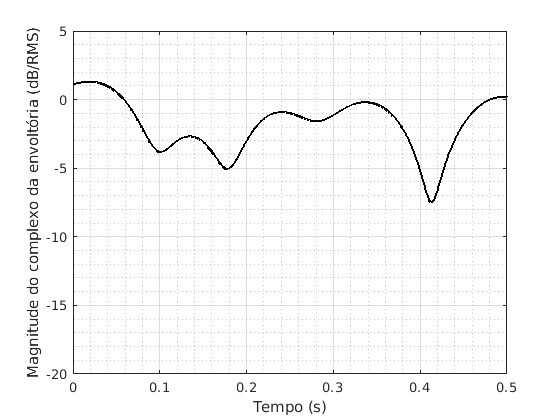

In [74]:
clc; clear; close all; 

filename = 'Clarke.mat'; %carregando o arquivo
delimiterIn = ' '; %espaçamento entre amostras
headerlinesIn = 1; %Pular a linha de cabeçalho
A = importdata(filename,delimiterIn,headerlinesIn); % importa arquivo

%% Variaveis
f = 915e6; %freq de operação (MHz)
c = 299792458; % velocidade da luz (m/s)
lambda = c/f; % comprimento de onda
ts=500e-6; %taxa de amostragem Fs
amostras=A.h; % amostras do sinal
Nd=length(amostras); % número de amostras
timeaxis=[1:Nd]*ts; % tempo espaçamento

%% Calculando a magnitude da envoltoria complexa/ RMS
rmsr=sqrt(std(abs(amostras))^2+mean(abs(amostras))^2);      
rrho=abs(amostras)/rmsr; % Obtendo o valor absoluto de Rho                          

%% LCR Calculado

SERIES=20*log10(rrho);
axiss=[ceil(min(SERIES))+1:floor(max(SERIES))-1]; % cria o array, iniciando do mínimo até o máximo, das amostras absoluto. Por fim, arendonda o valor para o valor acima mais próximo, tornando-o um inteiro.
b=20*log10(abs(amostras));
for i=1:length(axiss)                             
    LCR_emp(1,i) = LCR_(b, axiss(i), ts);
end

%% LCR Teórico 
lcrtheoretical = sqrt(2*pi)*10.^(axiss./20).*exp(-10.^(axiss./10)); 

%% AFD calculado
for i=1:length(axiss)                             
    AFD_emp(1,i) = AFD_(b, axiss(i), ts);
end

%% AFD teórico
afdtheoretical = (exp(10.^(axiss./10))-1)./(sqrt(2*pi)*10.^(axiss./20)); 

%% Calculo da frequência doppler
fd_lcr = LCR_emp./lcrtheoretical;
fd_afd = afdtheoretical./AFD_emp;

%% Plot fading
figure;
plot(timeaxis,10*log10(rrho),'k','LineWidth',1.5)
grid on
xlabel('Tempo (s)') 
ylabel('Magnitude do complexo da envoltória (dB/RMS)')
grid minor
axis([0 0.5 -20 5])
%




A figura acima mostra a série temporal do desvanecimento de pequena escala gerado sinteticamente com espalhamento _Doppler_.

Após a geração do sinal, faz-se o uso do método da máxima verossimilhança para estimação dos parâmetros do canal e geração da PDF e CDF.

Abra um novo script no Matlab para gerar a função de cálculo da **PDF** e da **CDF**, salve-o como **cdf.m** e escreva o seguinte código:

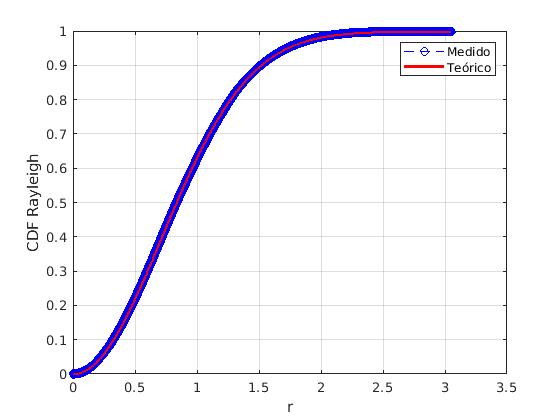

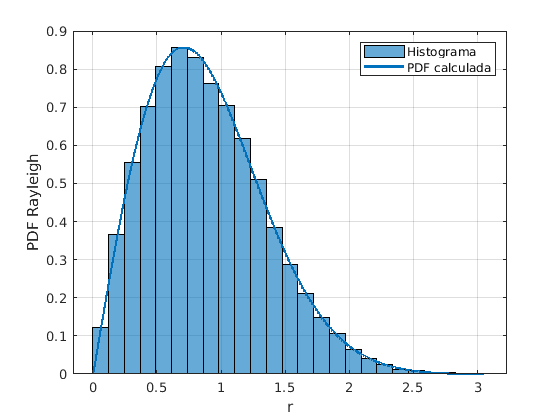

In [76]:
%%Cálculo da CDF
clc; clear; close all;
filename = 'Clarke.mat';
delimiterIn = ' ';
headerlinesIn = 1;
A = importdata(filename,delimiterIn,headerlinesIn);
vtFadingEst = A.h;
dSigma = raylfit(abs(vtFadingEst),'alpha');
%% CDF RAYLEIGH
[dF1,dX1] = ecdf(abs(vtFadingEst));
vtCdfray=raylcdf(dX1,dSigma);

%Plot da CDF
a = figure;
plot(dX1,dF1,'b--o')
hold on
plot(dX1,vtCdfray,'r','linewidth', 2)
ylabel('CDF Rayleigh')
xlabel('r')
legend('Medido','Teórico')
grid on
%% PDF Rayleigh
vtPdfray = raylpdf(dX1,dSigma);
b = figure;
histogram(abs(vtFadingEst),25,'Normalization','pdf')
line(dX1,vtPdfray,'linewidth', 2)
legend('Histograma','PDF calculada')
xlabel('r')
ylabel('PDF Rayleigh')
grid on

Para calcular o **_sigma_**, foi feito o uso da função **Raylfit(data,alpha)**, a qual retorna a estimativa de máxima verossimilhança e o intervalo de confiança de 100(1 - alpha)% dados os dados.
Enquanto que para o cáculo da **CDF** fez-se o uso da função **_raylcdf_** raylcdf(x,b) retorna a CDF da distribuição Rayleigh cdf em cada valor em x usando o parâmetro de escala correspondente, b.
A PDF estimada do desvanecimento foi gerada com o histograma das amostras do sinal, enquanto que a teórica foi feita com o **σ** estimado.mostrando boa convergência dos resultados.

## Parte 3: Resultados

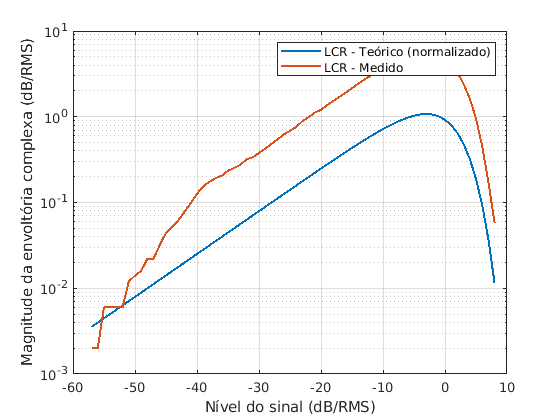

In [70]:
%% Plot LCR
figure,semilogy(axiss,lcrtheoretical,axiss,LCR_emp,'LineWidth',1.5)
xlabel('Nível do sinal (dB/RMS)') 
ylabel('Magnitude da envoltória complexa (dB/RMS)')
legend('LCR - Teórico (normalizado)','LCR - Medido')
grid on
%

As curvas geradas possuem valores maiores que os valores normalizados, pois estão relacionadas a velocidades relativas entre os terminais, o que ocasiona um espalhamento Doppler.

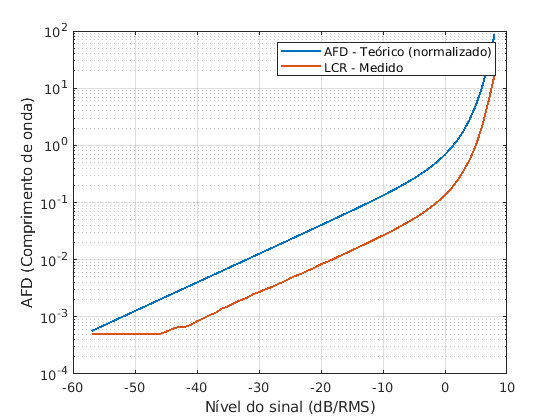

In [69]:
%% Plot AFD
figure,semilogy(axiss,afdtheoretical,axiss,AFD_emp,'LineWidth',1.5);
grid on
xlabel('Nível do sinal (dB/RMS)') 
ylabel('AFD (Comprimento de onda)') 
legend('AFD - Teórico (normalizado)','LCR - Medido')
grid on
%

Como a curva medida possui uma frequência _Doppler_, sua variação temporal é maior que a curva
normalizada. Por este motivo o tempo médio que o sinal fica abaixo do valor R é menor.
Isso ocorre pela maior variabilidade temporal do sinal com Doppler mais alto.

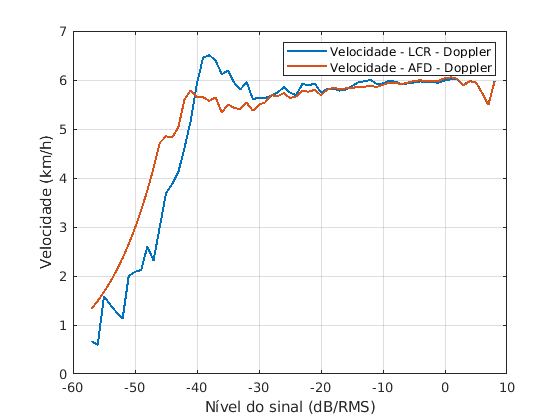

In [71]:
%% Velocidade
figure,plot(axiss,fd_lcr*lambda*3.6,axiss,fd_afd*lambda*3.6,'LineWidth',1.5)
xlabel('Nível do sinal (dB/RMS)')
ylabel('Velocidade (km/h)')
legend('Velocidade - LCR - Doppler','Velocidade - AFD - Doppler')
grid on

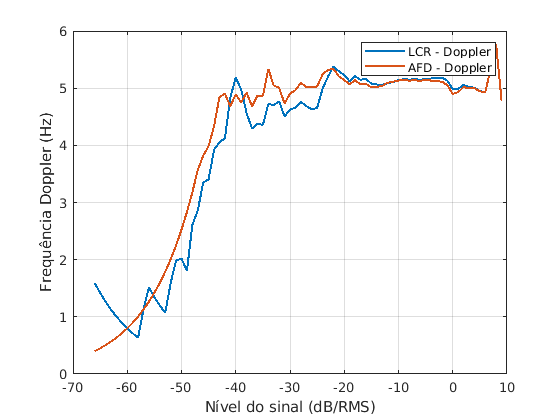

In [13]:
%% Plot frequência doppler
figure,plot(axiss,fd_lcr,axiss,fd_afd,'LineWidth',1.5)
xlabel('Nível do sinal (dB/RMS)')
ylabel('Frequência Doppler (Hz)')
legend('LCR - Doppler','AFD - Doppler')
grid on

Pela figura acima, observa-se que variabilidade da frequência Doppler ao longo da intensidade do sinal que, para valores abaixo de -35 dB/RMS, a precisão decai pela pouca quantidade de amostras abaixo desse valor. Contudo, a convergência ocorre para uma faixa de valores de R entre -30 e -5 dB/RMS. Vale ressaltar que, nesse caso, o sinal possui um número elevado de amostras, o que nem sempre é possível de se obter em casos reais,por limitação física dos hardwares.

In [35]:
opengl('save', 'software');

### Referências 

[1] (https://repositorio.ufrn.br/jspui/bitstream/123456789/28236/1/Caracterizacaocanalutilizando_Leite_2019.pdf) \
[2] (https://www.rfwireless-world.com/Terminology/Level-Crossing-Rate-vs-Average-Fade-Duration.html) \
